# Hierarchical Clustering Notebook

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

We're going to play with the whiskey dataset, let's take a look:

https://www.mathstat.strath.ac.uk/outreach/nessie/datasets/whiskies.txt

In [2]:
df = pd.read_csv('https://www.mathstat.strath.ac.uk/outreach/nessie/datasets/whiskies.txt')

In [3]:
df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


### Let's drop the columns we don't want, which are those?

In [4]:
columns_to_drop = ['RowID','Postcode',' Latitude',' Longitude']
df.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
df.columns

Index(['Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral'],
      dtype='object')

### Let's make the index something nice, so we can use it later as a label

In [7]:
df.set_index('Distillery', inplace = True)

## Let's talk now about what the potential business applications are of this clustered data

Okay, let's do it

In [8]:
def make_dendrogram(dataframe, linkage_method, metric, color_threshold=None):
    '''
    This function creates and plots the dendrogram created by hierarchical clustering.
    
    INPUTS: Pandas Dataframe, string, string, int
    
    OUTPUTS: None
    '''
    distxy = squareform(pdist(dataframe.values, metric=metric))
    Z = linkage(distxy, linkage_method)
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=12.,  # font size for the x axis labels
        labels = dataframe.index,
        color_threshold = color_threshold
    )
    plt.show()

### Which distance metric do we use?

### Which linkage should we use?

/Users/mark.llorente/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


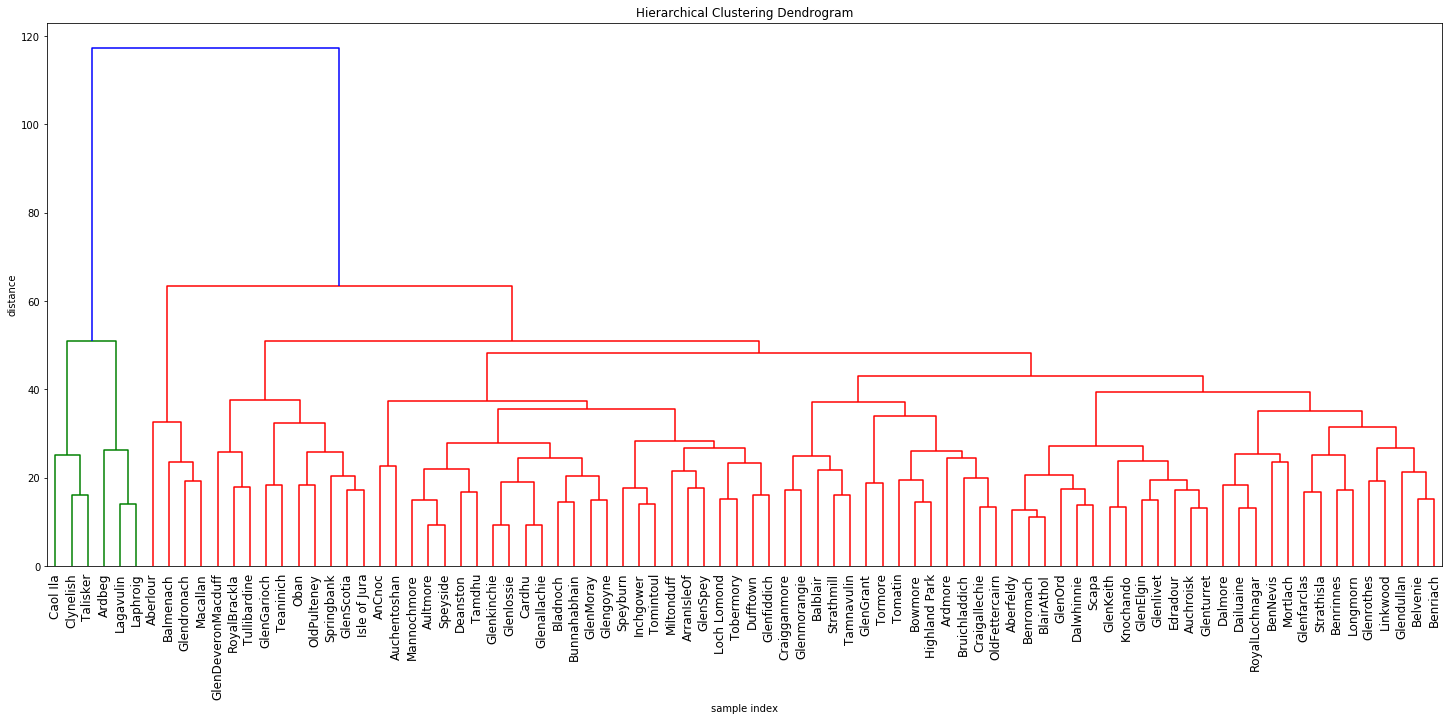

In [15]:
linktype = 'complete'
metric = 'cityblock'
make_dendrogram(df, linktype, metric, color_threshold=None)